In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Pln:

In [2]:
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.4861]], requires_grad=True)
Parameter containing:
tensor([0.4551], requires_grad=True)


In [3]:
model(torch.Tensor([2]))

tensor([1.4273], grad_fn=<AddBackward0>)

In [4]:
2*0.5088+0.1007

1.1183

In [5]:
torch.manual_seed(50)
class Model(nn.Module):
    
    def __init__(self,in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
        

In [6]:
my_first_pytorch_model = Model(1,1)
print(my_first_pytorch_model)

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [7]:
my_first_pytorch_model

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [8]:
for name,parameters  in my_first_pytorch_model.named_parameters():
    print(name, '\t',parameters.item())

linear.weight 	 0.23604393005371094
linear.bias 	 -0.8626136779785156


## Action1: Y = mx+c series
* we plan to create a X,y dataset and test out Neural net from pytorch

In [9]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [10]:
X[:5]

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [11]:
print(X.shape)

torch.Size([50, 1])


In [12]:
#creating some errors to the data
e = torch.randint(-8,9,(50,1),dtype= torch.float)
y = 2*X + e

In [13]:
type(y)

torch.Tensor

Text(0.5, 0, 'x')

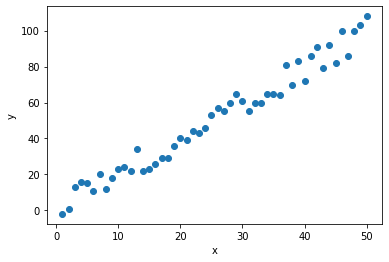

In [14]:
plt.scatter(X.numpy(),y.numpy())
plt.ylabel('y')
plt.xlabel('x')

## predictions with forwards pass

In [15]:
dummy_model = Model(1,1)
w,b = dummy_model.linear.weight.item(), dummy_model.linear.bias.item()

In [16]:
print(w,b)

0.4533398151397705 0.8972148895263672


In [17]:
x_inputs = np.linspace(0.0,50,50)
y_pred = w*x_inputs + b

Text(0.5, 0, 'x')

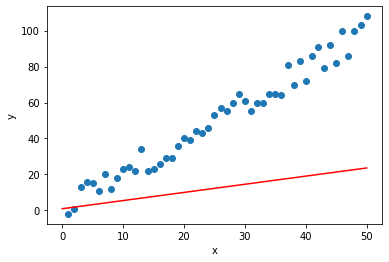

In [18]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x_inputs,y_pred,color='red')
plt.ylabel('y')
plt.xlabel('x')

## Action 2: Define loss function & Optimizer

In [25]:
criterion = nn.MSELoss() 

In [26]:
optimizer = torch.optim.SGD(dummy_model.parameters(), lr=0.001)

# Action 3: Train the model

In [27]:
epochs = 50 
losses = []

epoch= 0
while epoch <=epochs:
    y_prediction = dummy_model.forward(X)
    loss = criterion(y_prediction,y)
    losses.append(loss.detach().numpy())
    print(f'epoch: {epoch} loss: {loss.item()} weight: {dummy_model.linear.weight.item():10.8f} bias:{dummy_model.linear.bias.item():10.8f}')
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    epoch +=1

epoch: 0 loss: 1991.9454345703125 weight: 0.45333982 bias:0.89721489
epoch: 1 loss: 1042.2342529296875 weight: 3.04987741 bias:0.97378016
epoch: 2 loss: 551.93212890625 weight: 1.18425488 bias:0.91776884
epoch: 3 loss: 298.8065185546875 weight: 2.52476311 bias:0.95701629
epoch: 4 loss: 168.12661743164062 weight: 1.56161690 bias:0.92781931
epoch: 5 loss: 100.66110229492188 weight: 2.25368214 bias:0.94780123
epoch: 6 loss: 65.83080291748047 weight: 1.75645208 bias:0.93244785
epoch: 7 loss: 47.849021911621094 weight: 2.11374903 bias:0.94248390
epoch: 8 loss: 38.56550216674805 weight: 1.85705531 bias:0.93427771
epoch: 9 loss: 33.772605895996094 weight: 2.04152322 bias:0.93917936
epoch: 10 loss: 31.298049926757812 weight: 1.90900970 bias:0.93466330
epoch: 11 loss: 30.020343780517578 weight: 2.00425220 bias:0.93691450
epoch: 12 loss: 29.36056137084961 weight: 1.93584859 bias:0.93430382
epoch: 13 loss: 29.019773483276367 weight: 1.98502707 bias:0.93518692
epoch: 14 loss: 28.843669891357422 we

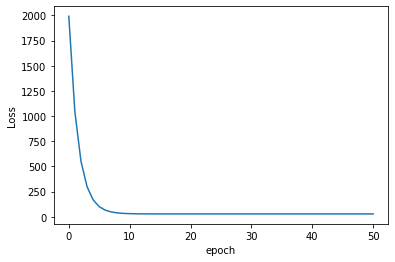

In [28]:
plt.plot(range(epochs+1), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [29]:
w,b = dummy_model.linear.weight.item(), dummy_model.linear.bias.item()

In [30]:
x_inputs = np.linspace(0.0,50,50)
y_pred = w*x_inputs + b

Text(0.5, 0, 'x')

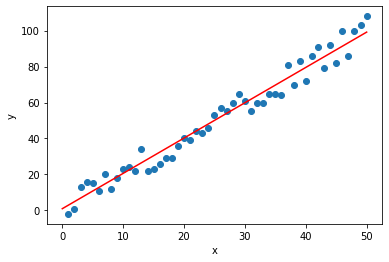

In [31]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x_inputs,y_pred,color='red')
plt.ylabel('y')
plt.xlabel('x')